In this project, we'll work with data from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/), a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

    > population - The population as of 2015.
    > population_growth - The annual population growth rate, as a percentage.
    > area - The total land and water area.

You can download the SQLite database, factbook.db, [from this GitHub repo](https://github.com/factbook/factbook.sql/releases)

In [ ]:
import pandas as pd
import sqlite3

lets get information about the tables in the database

In [2]:
conn = sqlite3.connect('factbook.db')
query = "SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


Displaying the first five rows of the facts table

In [3]:
query2 = 'SELECT * FROM facts LIMIT 5'
pd.read_sql_query(query2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## SUMMARY STATISTICS

In [4]:
query3 = '''
select min(population) min_population, max(population) max_population, 
min(population_growth) min_population_growth, max(population_growth) max_population_growth 
from facts
'''
pd.read_sql_query(query3, conn)

,min_population,max_population,min_population_growth,max_population_growth
0,0,7256490011,0.0,4.02


In [5]:
query4 = 'select * from facts where population = 0.0'
pd.read_sql_query(query4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
query5 = 'select * from facts where population = 7256490011'
pd.read_sql_query(query5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


No indigenous inhabitant exists in the antarctica but there are both summer-only and permanent staffed research stations asstated on the antarctia factbook page. This explains the population of 0 - [CIA factbook page for antarctica](https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html)
Also, 7256490011 refers to the overall population of the world

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbee035518>,
      dtype=object)

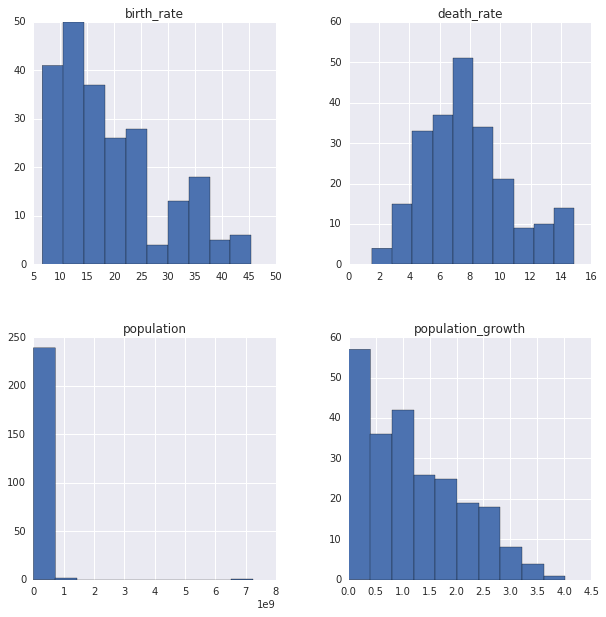

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

query6 = '''
select population, population_growth, birth_rate, death_rate from facts
where population != (select min(population) from facts) or population != (select max(population) from facts)
'''
pd.read_sql_query(query6, conn).hist(ax=ax)

## Exploring population density

In [25]:
query7 = '''select name countries,cast(population/area_land as float) population_density
            from facts order by population_density desc limit 20'''
pop_density = pd.read_sql_query(query7, conn)

In [26]:
pop_density

,countries,population_density
0,Macau,21168.0
1,Monaco,15267.0
2,Singapore,8259.0
3,Hong Kong,6655.0
4,Gaza Strip,5191.0
5,Gibraltar,4876.0
6,Bahrain,1771.0
7,Maldives,1319.0
8,Malta,1310.0
9,Bermuda,1299.0


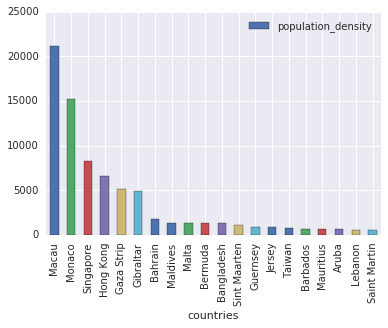

In [28]:
pop_density.plot.bar(x= 'countries',y='population_density',rot=90)

## RATIO OF WATER TO LAND

In [18]:
query8 = '''select name, (cast(area_water as float) / cast(area_land as float)) water_to_land
from facts where area_land != 0.0 and area_water != 0.0 order by 
water_to_land desc'''
pd.read_sql_query(query8, conn)

,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240
